In [2]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

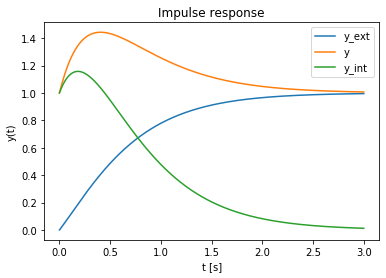

In [4]:
#A6.2)
t0, t1, Nt = 0, 3, 1000
T = np.linspace(t0, t1, Nt)
dT = (t1-t0)/Nt
denext = np.array([1, 5, 6])
numext = np.array([1, 6])
x = np.heaviside(T, 0)

y0, dy0 = 1, 2
denint = np.array([1, 5, 6])
numint = np.array([y0, y0*5 + dy0])

LTIext = signal.lti(numext, denext)
LTIint = signal.lti(numint, denint)
pulse = LTIint.impulse(0, T)

text, yext, xext = signal.lsim(LTIext, x, T)
tint, yint, xint = signal.lsim(LTIint, x, T)

plt.title("Impulse response")
plt.plot(T, yext, label = "y_ext")
#plt.plot(T, yint, label = "y_int")
plt.plot(T, yext + pulse[1], label = "y")
plt.plot(T, pulse[1], label = "y_int")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.legend()

Eigenfrequency =  224.4943820224718 Hz


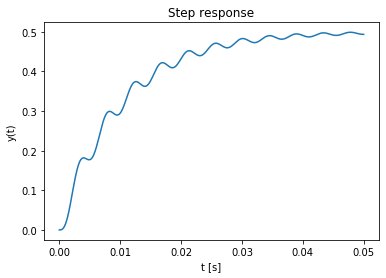

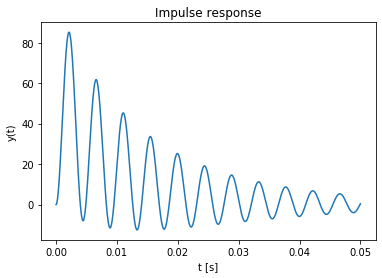

In [181]:
#A6.3)
#a.)
R1, R2 = 10, 10
L1, L2 = 0.1, 0.1
C = 1e-5
t = np.linspace(0, 0.05, 1000)
A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, -1/L2], [1/C, 1/C, 0]])
B = np.array([[1/L1], [0], [0]])
c = np.array([[0, -R2, 0]])
D = np.array([[0]])
#print(np.shape(A), np.shape(B), np.shape(C), np.shape(D))

sys = signal.lti(A, B, c, D)
step = sys.step(T = t)
impuls = sys.impulse(T = t)


plt.figure(2)
plt.title("Step response")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.plot(step[0], step[1])

plt.figure(3)
plt.title("Impulse response")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.plot(impuls[0], impuls[1])

peaks, _ = signal.find_peaks(impuls[1])

#b.)
print("Eigenfrequency = ",1/(impuls[0][peaks[5]]-impuls[0][peaks[4]]), "Hz")

In [182]:
#d.)
#The steady state solution for the step response agrees with ohm's law for a voltage divider.
#The capacitors lead no current, and the inductors have no impedance at the steady state solution,
#so we're left with a voltage divider of two equal resistors, hence y(t) approaches 0.5.

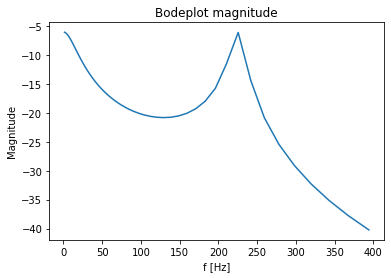

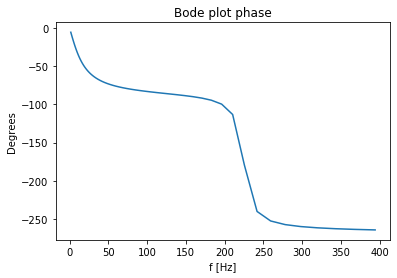

In [183]:
#c.)
w, mag, phase = sys.bode()
plt.figure(4)
plt.title("Bodeplot magnitude")
plt.ylabel("Magnitude")
plt.xlabel("f [Hz]")
plt.plot(w[:80]/(2*np.pi), mag[:80])

plt.figure(5)
plt.title("Bode plot phase")
plt.xlabel("f [Hz]")
plt.ylabel("Degrees")
plt.plot(w[:80]/(2*np.pi), phase[:80])

In [184]:
#The peak matches the eigenfrequency

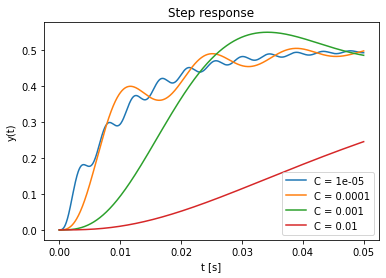

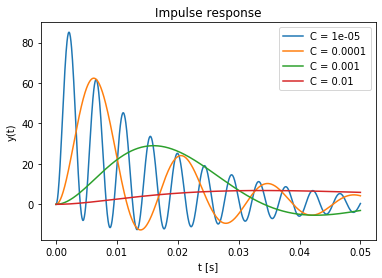

In [185]:
#e.)
Ca = np.array([10, 100, 1000, 10000])
TC = np.linspace(0, 0.05, 1000)
for a in Ca:
    C = a*1e-6
    t = np.linspace(0, 0.05, 1000)
    A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, -1/L2], [1/C, 1/C, 0]])
    B = np.array([[1/L1], [0], [0]])
    c = np.array([[0, -R2, 0]])
    D = np.array([[0]])
    sysC = signal.lti(A, B, c, D)
    stepC = sysC.step(T = TC)
    impulsC = sysC.impulse(T = TC)
    plt.figure(7)
    plt.title("Step response")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.plot(stepC[0], stepC[1], label = f"C = {np.round(C, 8)}")
    plt.legend()
    
    plt.figure(8)
    plt.title("Impulse response")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.plot(impulsC[0], impulsC[1], label = f"C = {np.round(C, 8)}")
    plt.legend()

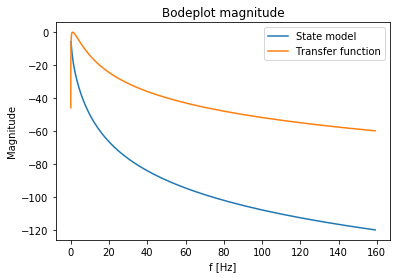

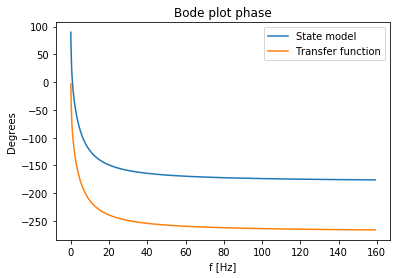

In [189]:
#g.)
R1, R2 = 100, 100
L1, L2 = 2, 5
C = 0.01
t = np.linspace(0, 0.05, 1000)
A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, -1/L2], [1/C, 1/C, 0]])
B = np.array([[1/L1], [0], [0]])
c = np.array([[0, -R2, 0]])
D = np.array([[0]])

sysfinal1 = signal.lti(A, B, c, D)
w1, mag1, phase1 = sysfinal1.bode()

numf, denf = np.array([1000, 0]), np.array([1, 70, 1070, 2000])
sysfinal2 = signal.lti(numf, denf)
w2, mag2, phase2 = sysfinal2.bode()


plt.figure(9)
plt.title("Bodeplot magnitude")
plt.ylabel("Magnitude")
plt.xlabel("f [Hz]")
plt.plot(w1/(2*np.pi), mag1, label = "State model")
plt.plot(w2/(2*np.pi), mag2, label = "Transfer function")
plt.legend()

plt.figure(10)
plt.title("Bode plot phase")
plt.xlabel("f [Hz]")
plt.ylabel("Degrees")
plt.plot(w2/(2*np.pi), phase2, label = "State model")
plt.plot(w1/(2*np.pi), phase1, label = "Transfer function")
plt.legend()

In [187]:
#They have the same tendencies, but are quite far apart from each other...
print("End")

End
